# PCA — Dimensionality reduction and explained variance
This notebook demonstrates PCA on a high-dimensional dataset with injected outliers and missing values, preprocessing, fit, explained variance, and evolution of cumulative explained variance and projections.

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sns.set(style="whitegrid")

In [2]:
# Create high-dim dataset with outliers and missing values
rng = np.random.RandomState(42)
X, y = make_classification(n_samples=700, n_features=20, n_informative=6, n_redundant=2, random_state=42)
# feature-level outliers 3%
n_out = int(0.03 * X.shape[0])
out_idx = rng.choice(X.shape[0], n_out, replace=False)
X[out_idx, :5] += rng.normal(0, 10.0, size=(n_out, 5))
# missing values (~2%)
n_nan = max(1, int(0.02 * X.size))
rows = rng.randint(0, X.shape[0], n_nan)
cols = rng.randint(0, X.shape[1], n_nan)
X[rows, cols] = np.nan

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print("Shapes:", X_train.shape, X_test.shape)
print("NaNs (train/test):", np.isnan(X_train).sum(), np.isnan(X_test).sum())

Shapes: (490, 20) (210, 20)
NaNs (train/test): 180 93


In [3]:
# Preprocess: impute then StandardScaler
imputer = SimpleImputer(strategy='mean')
Xtr_imp = imputer.fit_transform(X_train)
Xte_imp = imputer.transform(X_test)

scaler = StandardScaler()
Xtr = scaler.fit_transform(Xtr_imp)
Xte = scaler.transform(Xte_imp)

Explained variance ratio (first 6 PCs): [0.11186539 0.10738745 0.07869409 0.06425641 0.06029605 0.05915861]


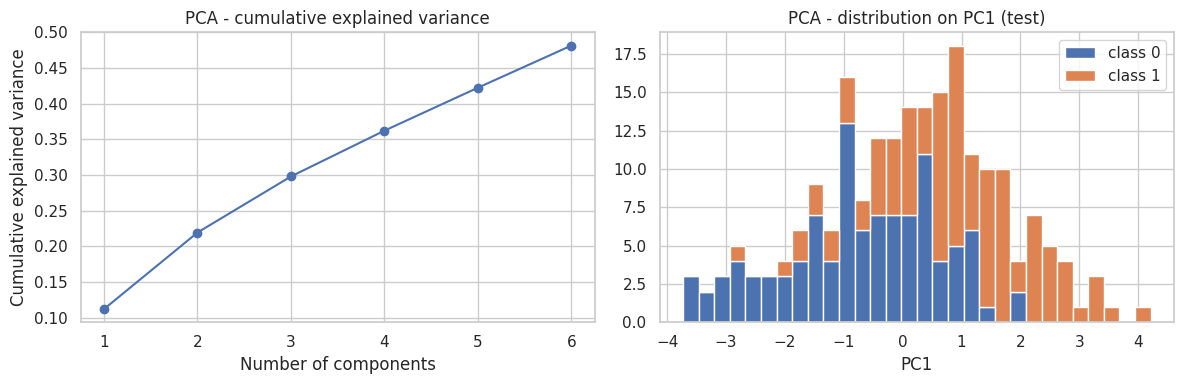

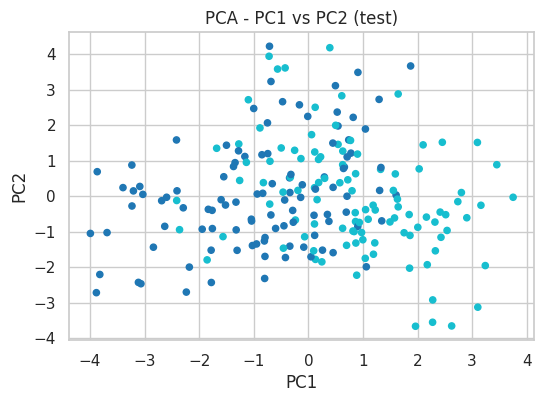

In [4]:
# Fit PCA and inspect explained variance
pca = PCA(n_components=6, random_state=42)
pca.fit(Xtr)
explained = pca.explained_variance_ratio_
print('Explained variance ratio (first 6 PCs):', explained)

# Evolution: cumulative explained variance and projections
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(np.arange(1, len(explained) + 1), np.cumsum(explained), marker='o')
ax1.set_xlabel('Number of components')
ax1.set_ylabel('Cumulative explained variance')
ax1.set_title('PCA - cumulative explained variance')

ax2 = fig.add_subplot(1, 2, 2)
X_p1 = pca.transform(Xte)[:, 0]
ax2.hist([X_p1[y_test == 0], X_p1[y_test == 1]], bins=30, label=['class 0', 'class 1'], stacked=True)
ax2.set_title('PCA - distribution on PC1 (test)')
ax2.set_xlabel('PC1')
ax2.legend()
plt.tight_layout()
plt.show()

# scatter first two PCs
pc2 = PCA(n_components=2).fit_transform(Xte)
plt.figure(figsize=(6,4))
plt.scatter(pc2[:,0], pc2[:,1], c=y_test, cmap='tab10', s=20)
plt.title('PCA - PC1 vs PC2 (test)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

PCA — Clear explanation with keywords

PCA (Principal Component Analysis) reduces many features into a few new combined features while keeping most important information.

Key terms and short explanations:

- **Principal component** — a new combined feature that captures a main direction of variation in the data.
- **Variance** — how spread out the data is along a direction; PCA ranks components by how much variance they explain.
- **Explained variance ratio** — the fraction of total variance each component accounts for; use the cumulative sum to decide how many components to keep.
- **Scaling (standardization)** — making features comparable by removing the mean and scaling to unit variance so PCA treats all features fairly.
- **Projection** — transforming original data into the space of principal components for visualization or as input to other models.

When to use PCA: use it to simplify high-dimensional data for visualization or modeling when a few directions capture most of the variability. Note PCA captures linear patterns and may not represent non-linear relationships.

Conclusion / Observations

- PCA concentrated most of the data variance in the first few principal components; the cumulative **explained variance** plot helps choose how many components to keep.
- PCA is helpful for **visualization** and for reducing feature count before modeling, but it only captures **linear** structure.
- Scaling was important to ensure features contributed fairly to components.

Next steps: evaluate downstream model performance using reduced components, try kernel PCA or t‑SNE / UMAP for non‑linear structure, and inspect component loadings to interpret which original features matter most.